In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV


%matplotlib inline
sns.set(rc={'figure.figsize': [12, 10]}, font_scale=1.2)

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

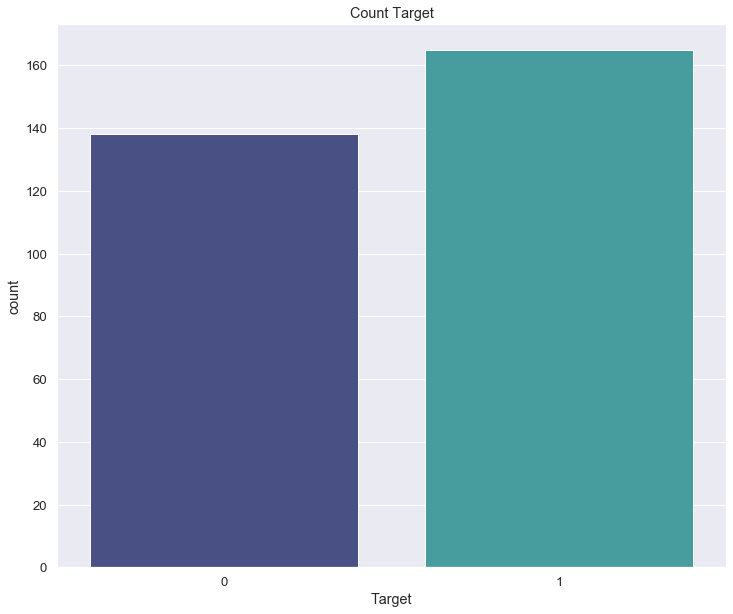

In [5]:
sns.countplot(df['target'],palette='mako')
plt.title('Count Target')
plt.xlabel("Target")
plt.show()

Patient who have heart disease more than people who don't have heart disease

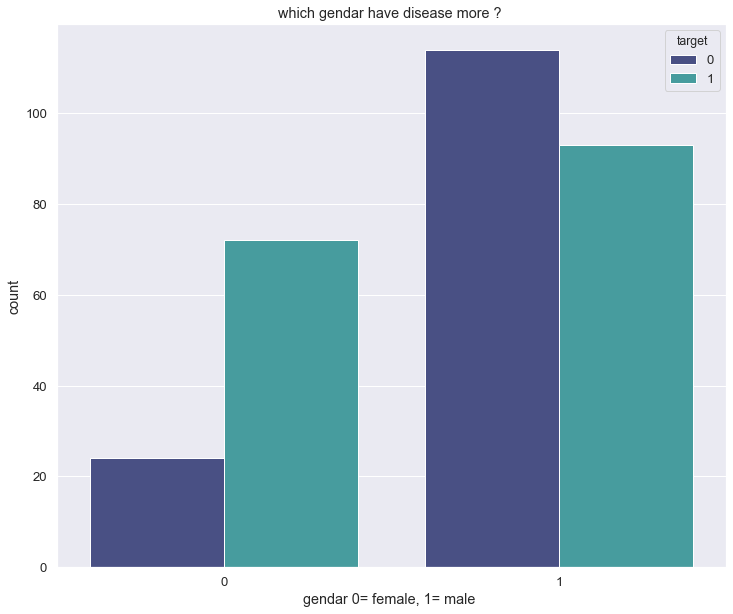

In [6]:
sns.countplot(df['sex'],hue=df['target'],palette='mako')
plt.title('which gendar have disease more ? ')
plt.xlabel("gendar 0= female, 1= male ")
plt.show()

Female have disease more than male 

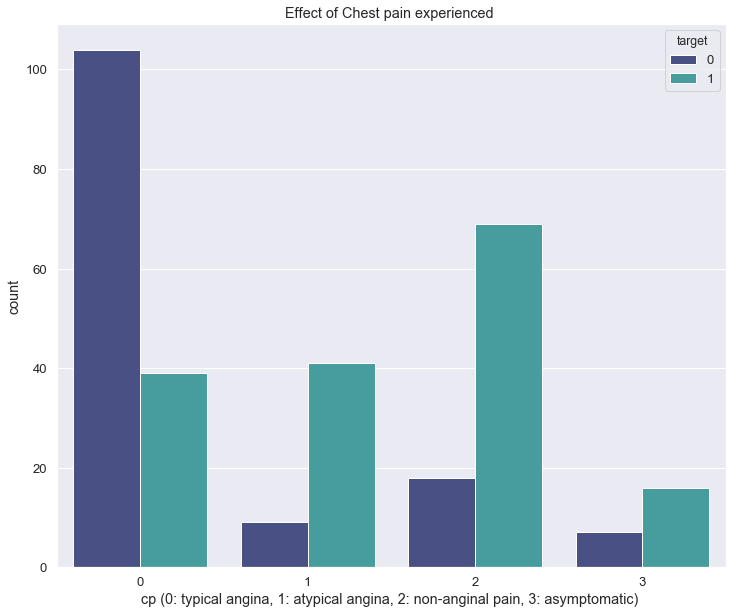

In [7]:
sns.countplot(df['cp'],hue=df['target'],palette='mako')
plt.title('Effect of Chest pain experienced ')
plt.xlabel("cp (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic) ")
plt.show()

 non-anginal pain and atypical angina are most thing get heart disease

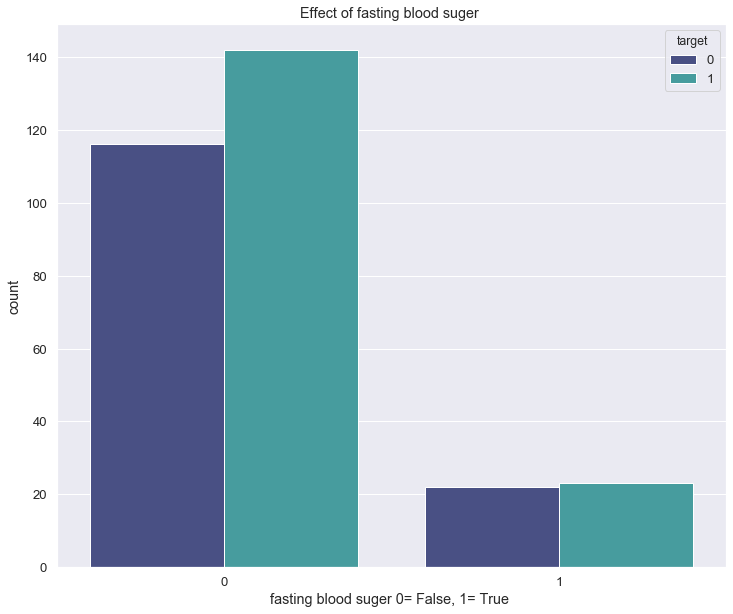

In [8]:
sns.countplot(df['fbs'],hue=df['target'],palette='mako')
plt.title('Effect of fasting blood suger ')
plt.xlabel("fasting blood suger 0= False, 1= True ")
plt.show()

it's proportionality between if he have fasting blood suger or not have doesn't effect on heart disease

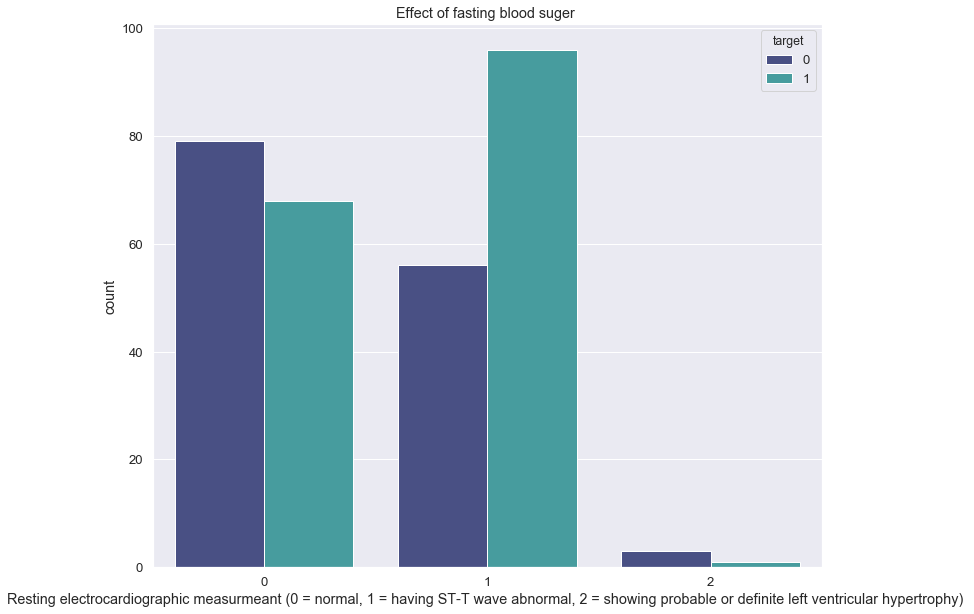

In [9]:
sns.countplot(df['restecg'],hue=df['target'],palette='mako')
plt.title('Effect of fasting blood suger ')
plt.xlabel("Resting electrocardiographic measurmeant (0 = normal, 1 = having ST-T wave abnormal, 2 = showing probable or definite left ventricular hypertrophy) ")
plt.show()

Patient having ST-T wave abnormal have heart disease more normal patient 

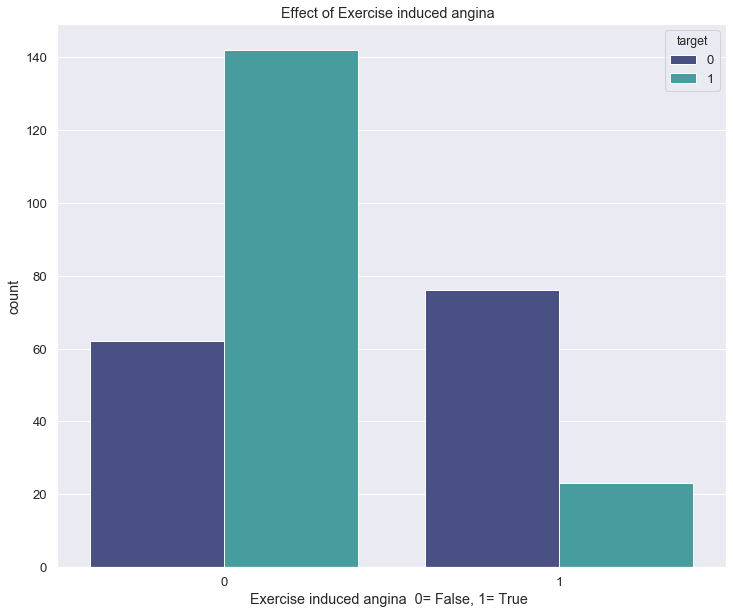

In [10]:
sns.countplot(df['exang'],hue=df['target'],palette='mako')
plt.title('Effect of Exercise induced angina  ')
plt.xlabel("Exercise induced angina  0= False, 1= True ")
plt.show()

People who don't do Exercise induced angina they get heart disease more than who do it 

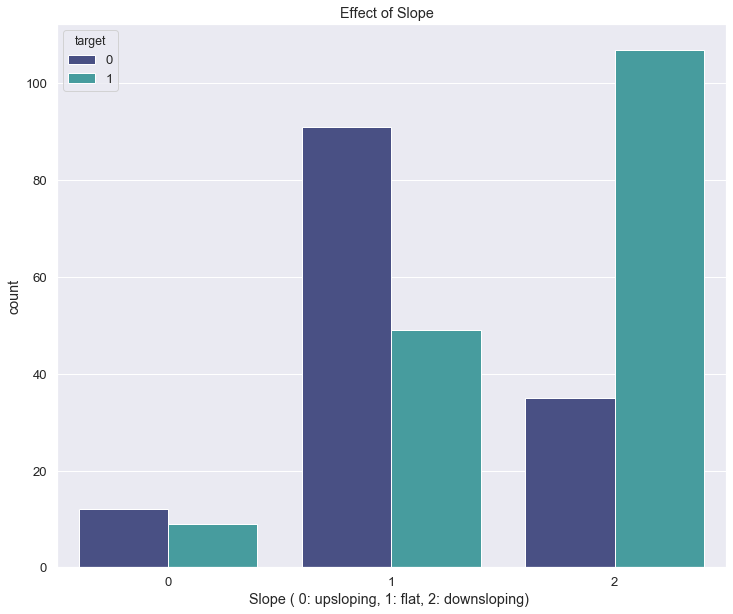

In [11]:
sns.countplot(df['slope'],hue=df['target'],palette='mako')
plt.title('Effect of Slope  ')
plt.xlabel("Slope ( 0: upsloping, 1: flat, 2: downsloping) ")
plt.show()

downsloping get heart disease more than upsloping and flat 

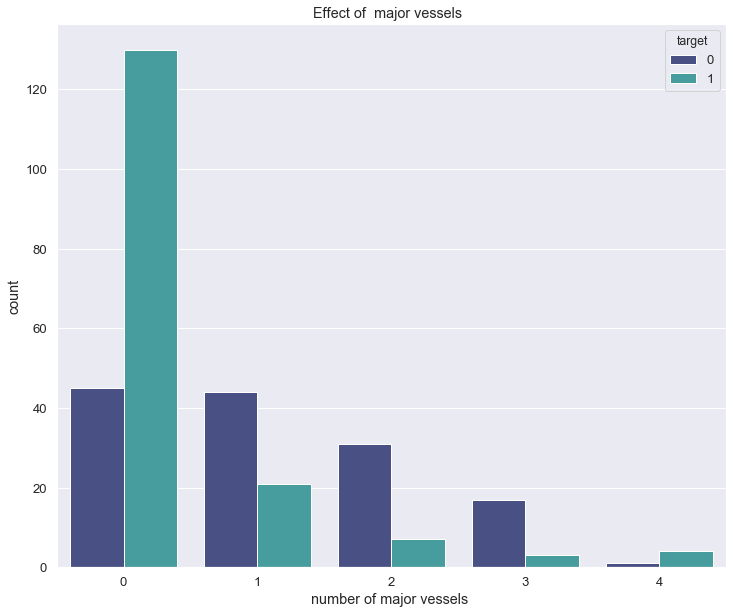

In [12]:
sns.countplot(df['ca'],hue=df['target'],palette='mako')
plt.title('Effect of  major vessels  ')
plt.xlabel("number of major vessels ")
plt.show()

if you have more 1 of major vessels your rate to get heart disease Decrease <br>
mean that column effect on heart

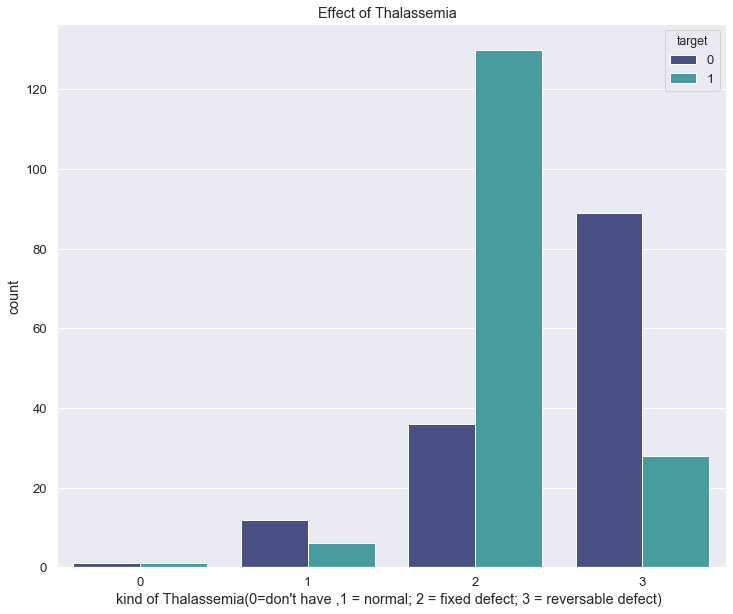

In [13]:
sns.countplot(df['thal'],hue=df['target'],palette='mako')
plt.title('Effect of Thalassemia  ')
plt.xlabel("kind of Thalassemia(0=don't have ,1 = normal; 2 = fixed defect; 3 = reversable defect) ")
plt.show()

fixed defect effect on heart with high rate

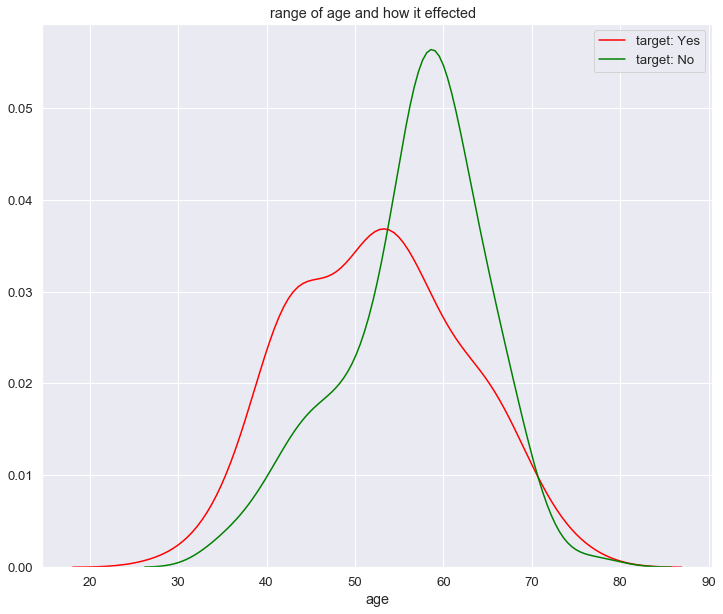

In [14]:
sns.kdeplot(df[df['target']==1]['age'],color='red',label='target: Yes')
sns.kdeplot(df[df['target']==0]['age'],color='green',label='target: No')
plt.title('range of age and how it effected  ')
plt.xlabel("age")
plt.show()

Patient who have heart disease their age between 45 : 55<br>
and people who don't have their age between 55:60

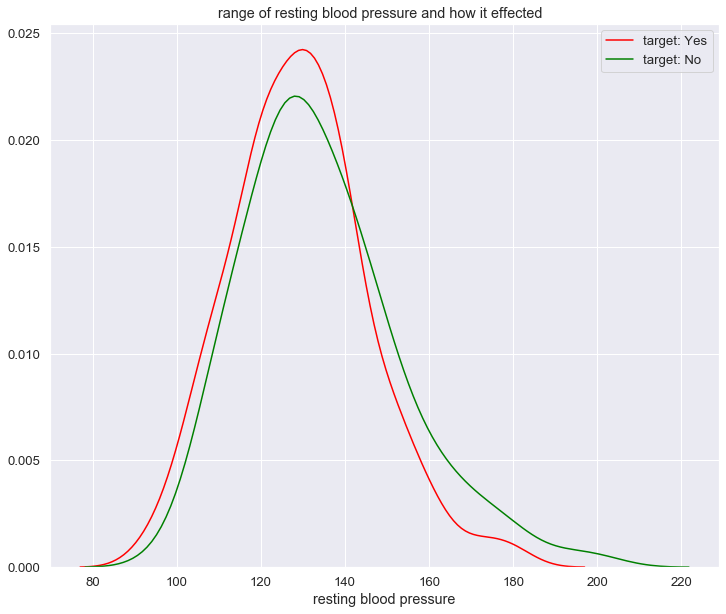

In [15]:
sns.kdeplot(df[df['target']==1]['trestbps'],color='red',label='target: Yes')
sns.kdeplot(df[df['target']==0]['trestbps'],color='green',label='target: No')
plt.title('range of resting blood pressure and how it effected  ')
plt.xlabel("resting blood pressure")
plt.show()

resting blood pressure doesn't effect on heart like we see they have same range 

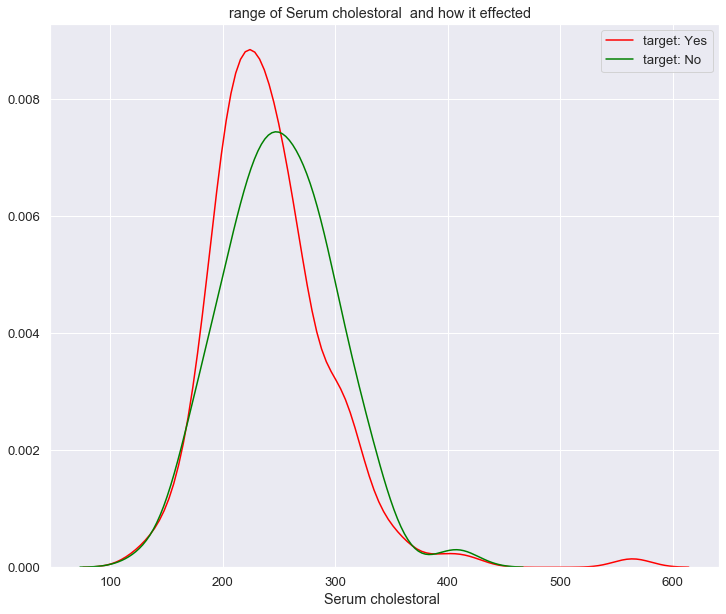

In [16]:
sns.kdeplot(df[df['target']==1]['chol'],color='red',label='target: Yes')
sns.kdeplot(df[df['target']==0]['chol'],color='green',label='target: No')
plt.title('range of Serum cholestoral  and how it effected  ')
plt.xlabel("Serum cholestoral ")
plt.show()

Serum cholestoral doesn't effect on heart like we see they have same range

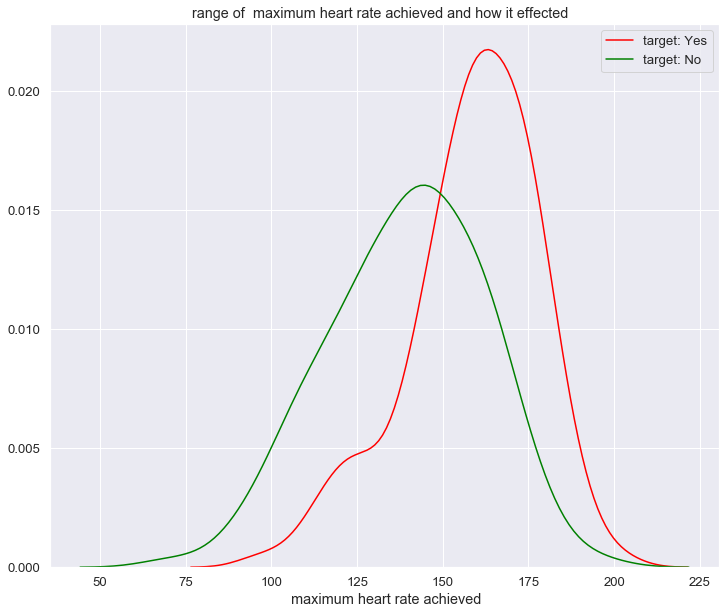

In [17]:
sns.kdeplot(df[df['target']==1]['thalach'],color='red',label='target: Yes')
sns.kdeplot(df[df['target']==0]['thalach'],color='green',label='target: No')
plt.title('range of  maximum heart rate achieved and how it effected  ')
plt.xlabel(" maximum heart rate achieved")
plt.show()

 maximum heart rate achieved Patient have disease between 155:175 <br>
 Patient don't have between 125 : 150

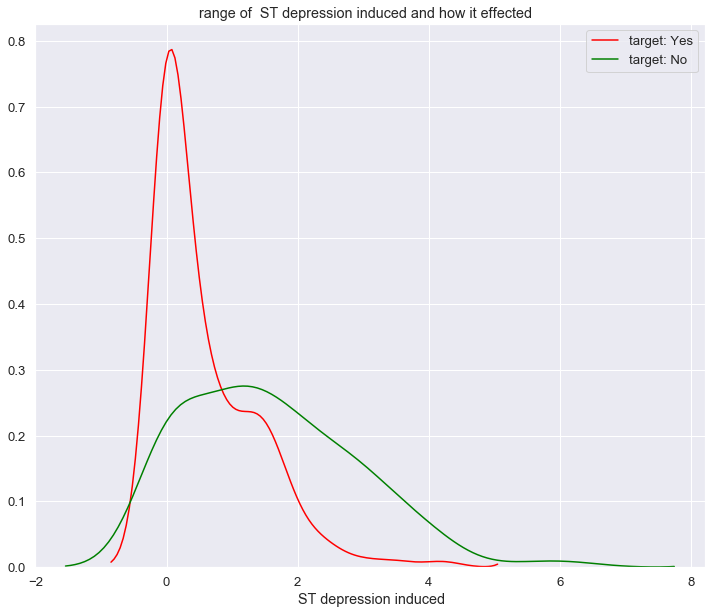

In [18]:
sns.kdeplot(df[df['target']==1]['oldpeak'],color='red',label='target: Yes')
sns.kdeplot(df[df['target']==0]['oldpeak'],color='green',label='target: No')
plt.title('range of  ST depression induced and how it effected  ')
plt.xlabel(" ST depression induced")
plt.show()

 ST depression induced to aviod disease patient must upper than 1 rate 

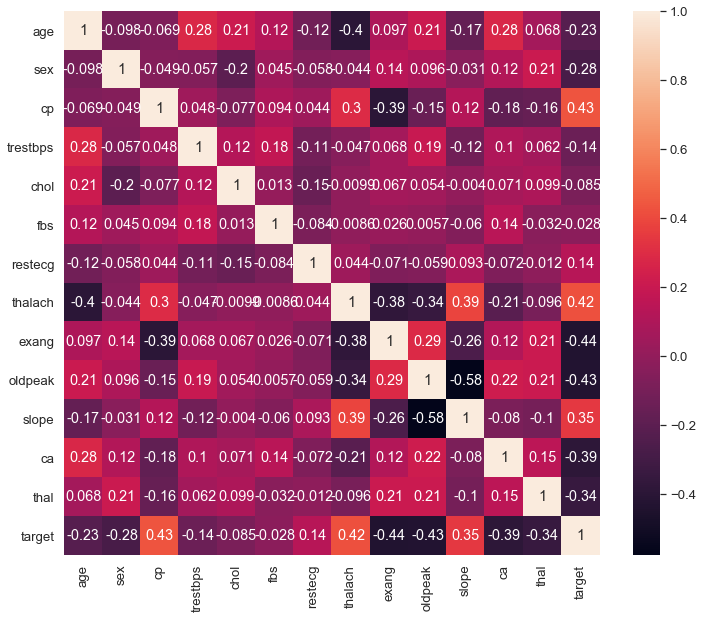

In [19]:
sns.heatmap(df.corr(),annot=True)

from first look we see that CP, thalach,slope have strong effect by {43%,42%,35%}<br>
and exang,oldpeak,ca,thal effect by - {44%,43%,39%,34%}


# Outlier

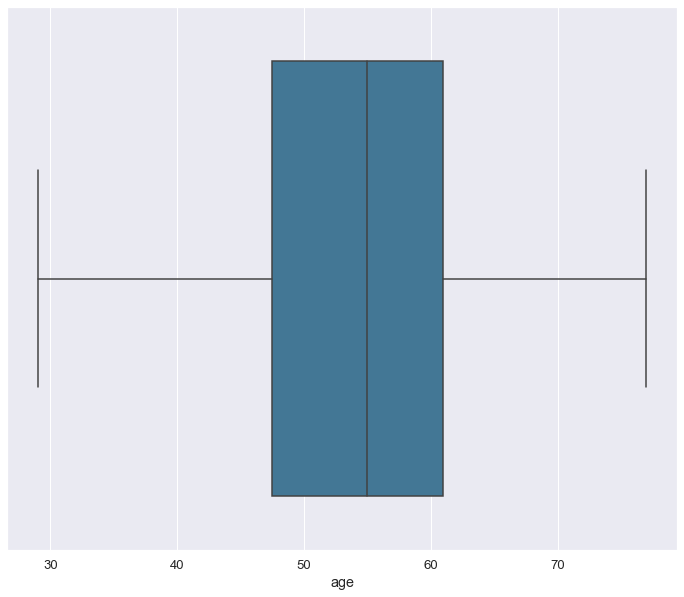

In [20]:
sns.boxplot(df['age'],palette='mako');

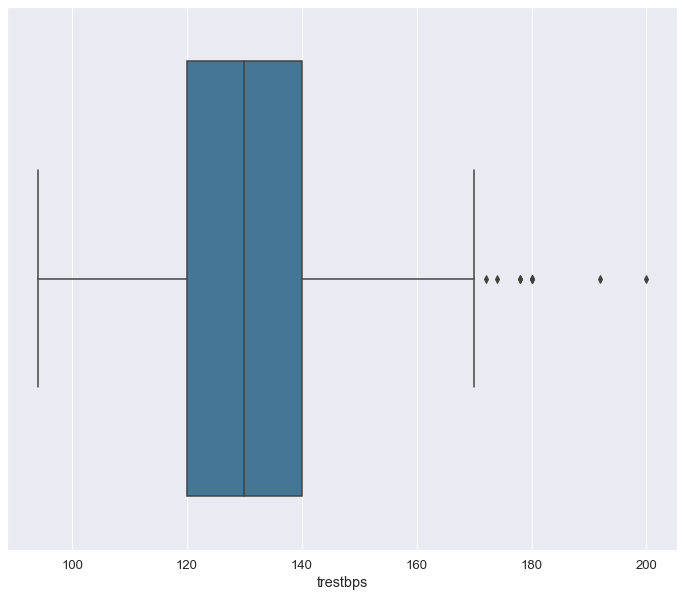

In [21]:
sns.boxplot(df['trestbps'],palette='mako');

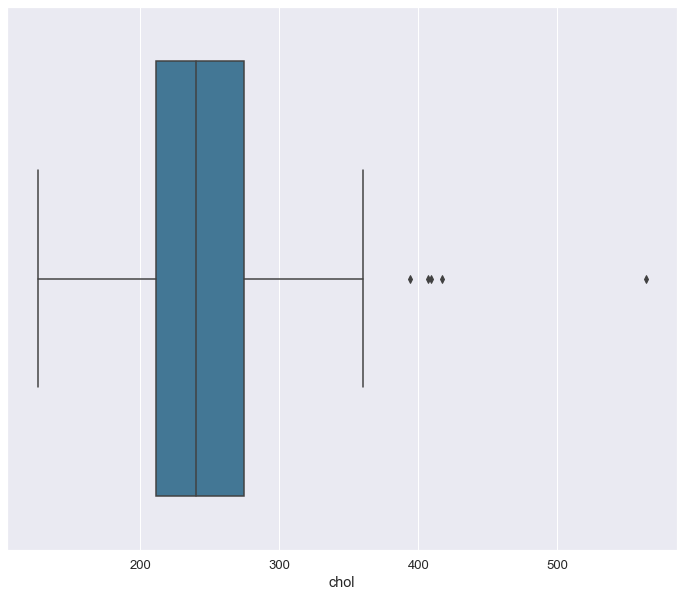

In [22]:
sns.boxplot(df['chol'],palette='mako');

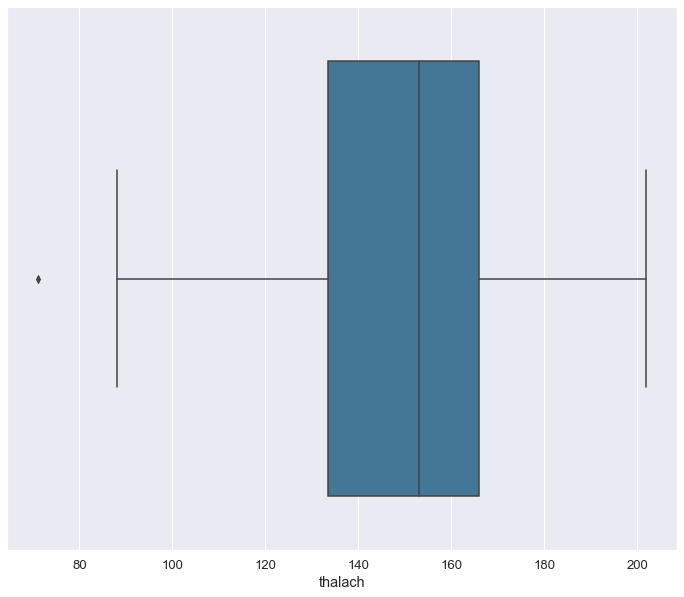

In [23]:
sns.boxplot(df['thalach'],palette='mako');

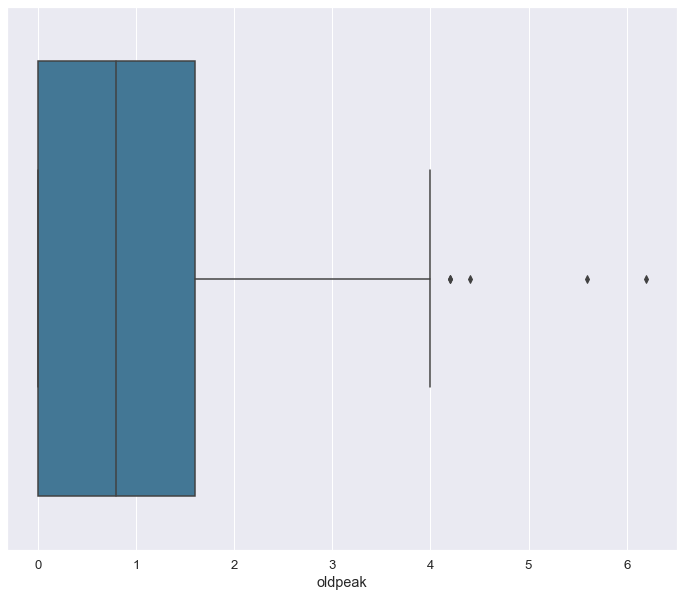

In [24]:
sns.boxplot(df['oldpeak'],palette='mako');

# Data preprocessing

Handle outlier

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [26]:

for col in df.columns:
    df.loc[(df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col])), col] = df[col].median()

In [27]:
x = df[['cp', 'thalach', 'slope', 'exang', 'oldpeak','ca','thal']]
y = df['target']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Choose model

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[24  5]
 [ 5 27]]
0.8360655737704918


In [31]:
parameters=[{'penalty':['l1','l2'],'C':[0.1,0.4,0.5],'random_state':[0]}]


grid_search = GridSearchCV(lr, parameters, scoring='accuracy', n_jobs=-1, )


result = grid_search.fit(x_train, y_train)

print(result.best_score_)
print(result.best_params_)

0.8306972789115645
{'C': 0.1, 'penalty': 'l2', 'random_state': 0}


In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C= 0.1, penalty= 'l2',random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[24  5]
 [ 4 28]]
0.8524590163934426


(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27a609c4c48>)

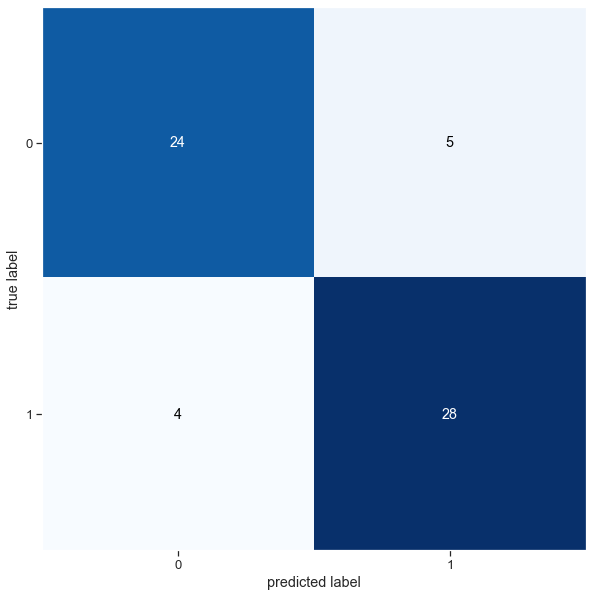

In [33]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84        29
         1.0       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [35]:
print(accuracy_score(y_test, y_pred)*100)

85.24590163934425


# Logistic Regression accuracy = 85.25%

# Random forest


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[25  4]
 [ 6 26]]
0.8360655737704918


In [38]:
params = [
        {'criterion':['gini', 'entropy'], 'n_estimators':[20, 50, 100, 150, 200, 500]}
         ]

grid_search = GridSearchCV(estimator=rfc,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)



Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    9.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [39]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7978333333333334
{'criterion': 'gini', 'n_estimators': 150}


In [40]:
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[24  5]
 [ 5 27]]
0.8360655737704918


(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27a60a5e588>)

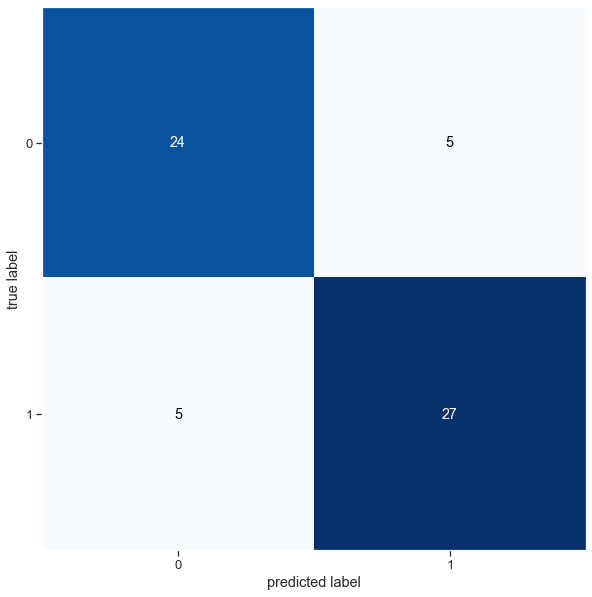

In [41]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        29
         1.0       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [43]:
print(accuracy_score(y_test, y_pred)*100)

83.60655737704919


# Random Forest Classifier get accuracy = 80.33%

# Train KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[23  6]
 [ 3 29]]
0.8524590163934426


In [45]:
params = [
        {'n_neighbors':np.arange(2,33),'n_jobs':[2,6]}
         ]

grid_search_knn= GridSearchCV(estimator=knn,
                           param_grid=params,
                           scoring='accuracy',
                           )
grid_search_knn.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_jobs': [2, 6],
                          'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [46]:
print(grid_search_knn.best_score_)
print(grid_search_knn.best_params_)

0.8306972789115648
{'n_jobs': 2, 'n_neighbors': 20}


In [47]:
knn = KNeighborsClassifier(n_jobs= 2, n_neighbors= 20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[23  6]
 [ 3 29]]
0.8524590163934426


(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27a60c66a88>)

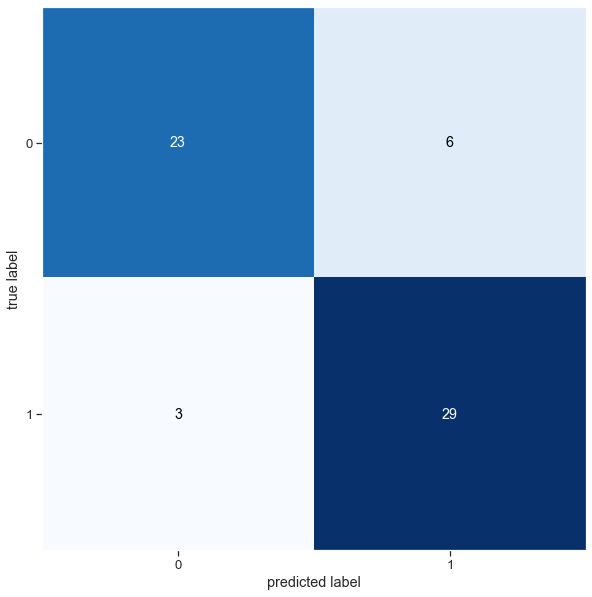

In [48]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.79      0.84        29
         1.0       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [50]:
print(accuracy_score(y_test, y_pred))

0.8524590163934426


# KNN get accuracy = 85.25%

we will use KNN model because it's better in f1 - score

# Pickle model

In [51]:
import pickle

In [52]:
filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [53]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8524590163934426
